<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Basic Plotting](05.01-Basic-Plotting.ipynb) | [Contents](00.00-Index.ipynb) | [Quiz](05.03-Quiz.ipynb) ></span>

<a href="https://colab.research.google.com/github/eurostat/e-learning/blob/main/r-official-statistics/05.02-ggplot2.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


<a id='top'></a>

# Evolutions: ggplot2, Plotly and Shiny
## Content  
- [ggplot2](#ggplot2)
- [Plotly](#plotly)
- [Shiny](#Shiny)



<a id='ggplot2'></a>

## ggplot2
In ggplot2, you built plots incrementally, starting with the data and coordinates you want to use and then specifying the graphical features: lines, points, bars, color, etc.  
The ggplot2 package has two plotting functions qplot() (quick plot) and ggplot() (grammar of graphics plot.). The qplot() function is similar to the base R plot() function in that it only requires a single function call and it can create several different types of plots.  
Let's start with an example for qplot function:

Loading required package: ggplot2



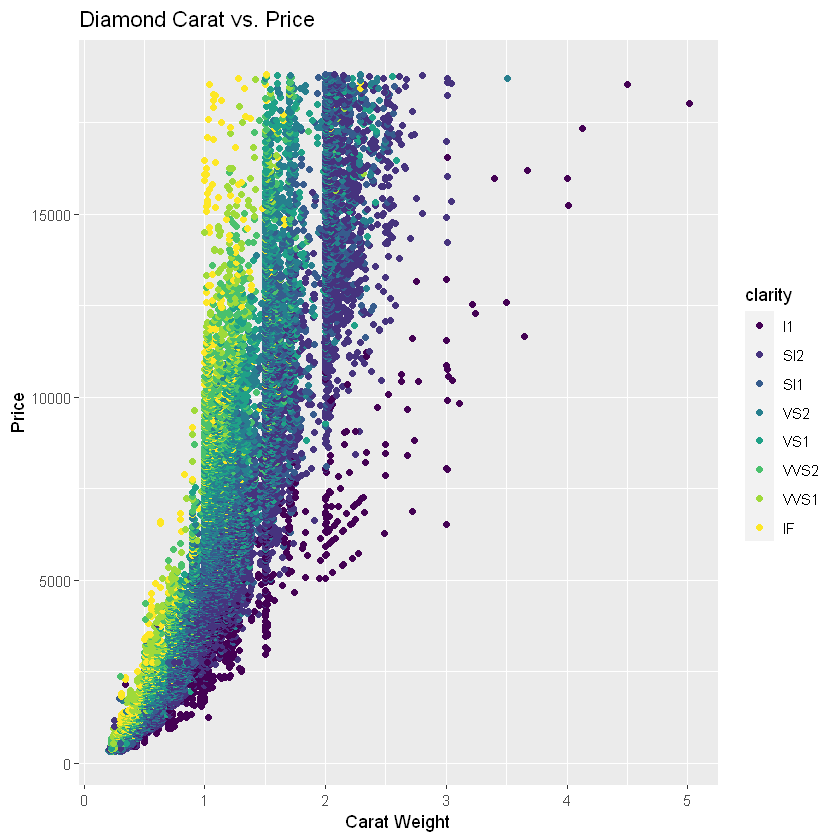

In [1]:
if (!require("ggplot2")) {
    install.packages("ggplot2")
    library(ggplot2)
}
# diamonds is a dataset that comes with ggplot2 library
qplot(x = carat,                            # x variable
      y = price,                            # y variable
      data = diamonds,                      # Data set
      geom = "point",                       # Plot type
      color = clarity,                      # Color points by variable clarity
      xlab = "Carat Weight",                # x label
      ylab = "Price",                       # y label
      main = "Diamond Carat vs. Price");    # Title



### Using ggplot() function:
- Every ggplot starts with the same basic syntax. Every ggplot starts with a call to the ggplot() function along with an argument specifying the data set to be used and aesthetic mappings from variables in the data set to visual properties of the plot, such as x and y position.
- When you use the ggplot() syntax, the call to ggplot() initializes the plot, but nothing is actually plotted until you add a visual layer. Let's add a layer of points to the plot using geom_point().

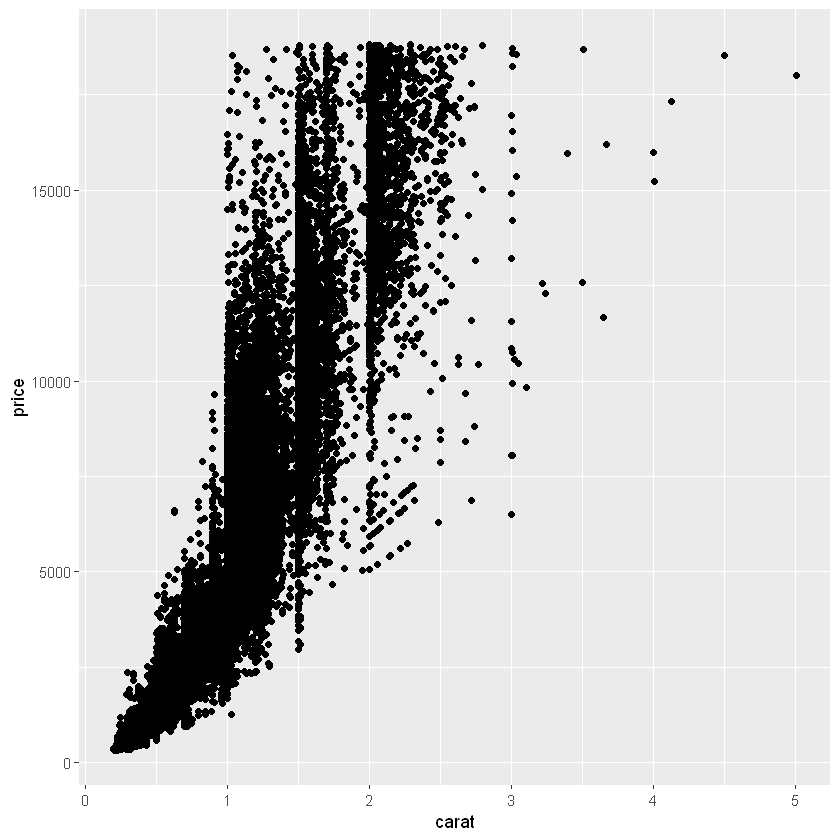

In [2]:
# Initialize plot* 
ggplot(data=diamonds, aes(x=carat, y=price)) +
    # Add a layer of points (make scatterplot)
    geom_point()



The layers you add determine the type of plot you create. Here is a list of geoms:
- geom_histogram()  : histogram
- geom_density()    : density plot
- geom_boxplot()    : boxplot
- geom_violin()     : violin plot (combination of boxplot and density plot)
- geom_bar()        : bar graph
- geom_point()      : scatterplot
- geom_jitter()     : scatterplot with points randomly perturbed to reduce overlap
- geom_line()       : line graph
- geom_errorbar()   : Add error bar
- geom_smooth()     : Add a best-fit line
- geom_abline()     : Add a line with specified slope and intercept
  
  <br>   
  
To finish this example we add some aesthetics (check geom_point params) and another part dealing with axes:

Warning message:
"Removed 126 rows containing missing values (geom_point)."


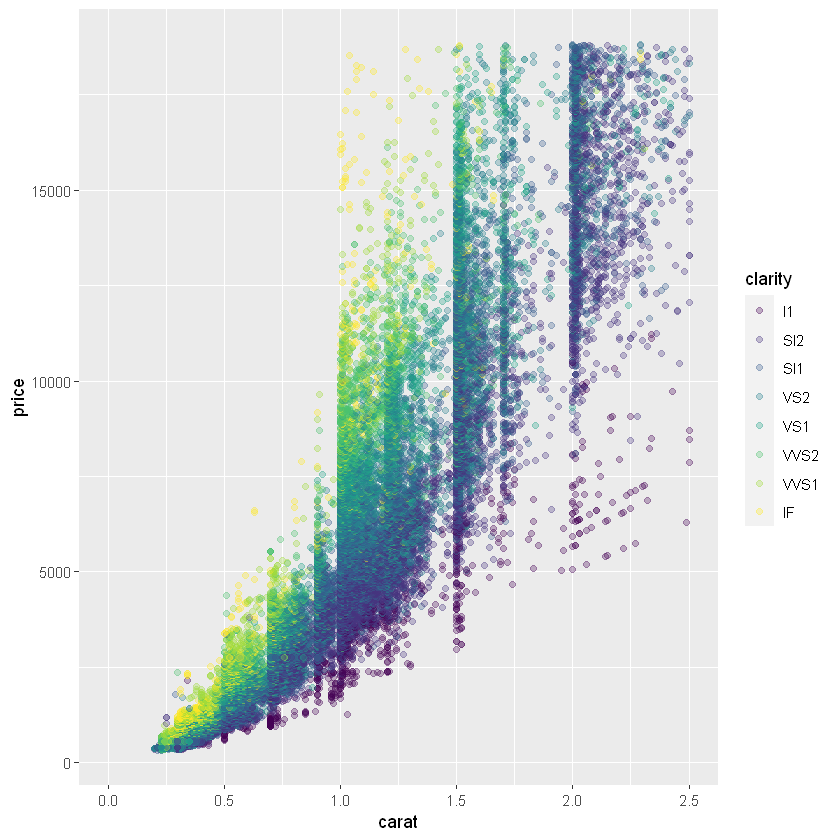

In [3]:
# Initialize plot 
ggplot(data=diamonds, aes(x=carat, y=price)) +
    # Add color based on clarity and transparency
    geom_point(aes(color = clarity), alpha = 0.3)  +
    # Specify x-axis range    
    xlim(0,2.5)

### Histograms and densities
Using the same dataset let's plot now a histogram, and next the densities:

Warning message:
"Removed 1889 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


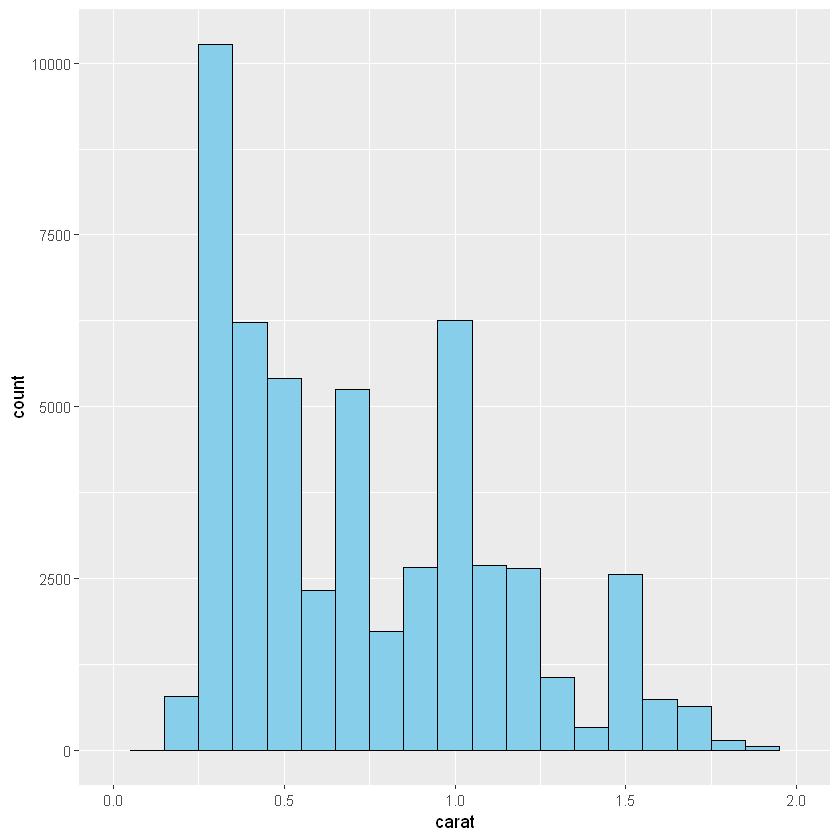

In [4]:
# Create a histogram of carat
# Initialize plot 
ggplot(data=diamonds, aes(x=carat)) +
    # Create histogram with blue bars
    # Set bar outline color to black
    # Set bin width
    geom_histogram(fill="skyblue", col="black", binwidth = 0.1) +
    # Add x-axis limits    
    xlim(0,2)

Warning message:
"Removed 1889 rows containing non-finite values (stat_density)."


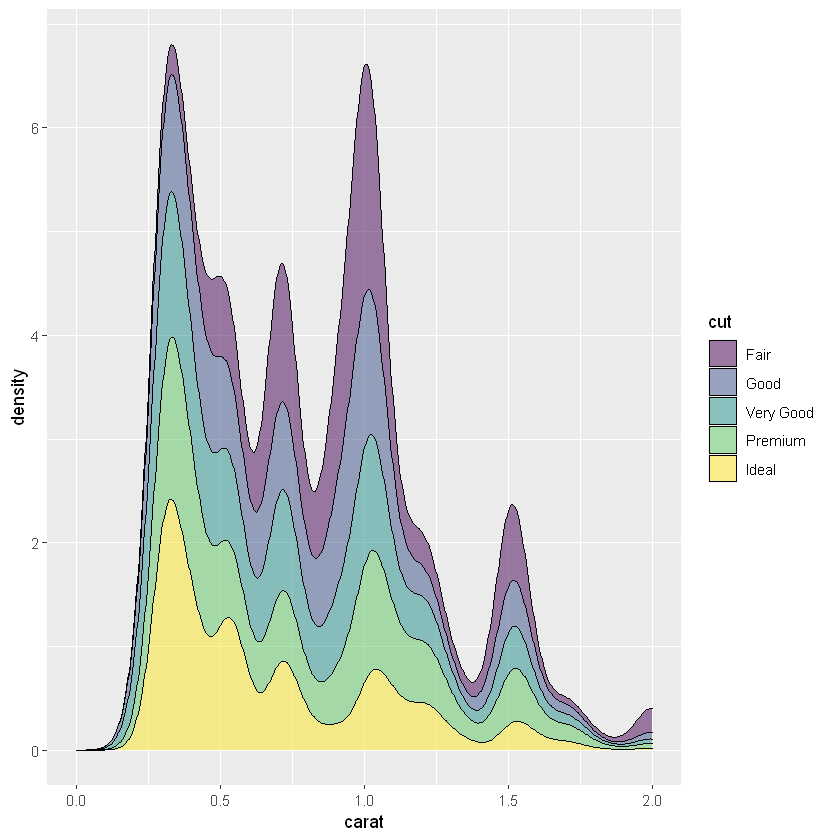

In [5]:
# Initialize plot
ggplot(data=diamonds, aes(x=carat)) +
        # Limit the x-axis*
        xlim(0,2) +
        # Create a stacked density chart
        # Fill based on cut
        # Set transparency
        geom_density(position="stack", aes(fill=cut), alpha = 0.5)

Or we can plot them togheter:

Warning message:
"Removed 2367 rows containing non-finite values (stat_density)."
Warning message:
"Removed 2367 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


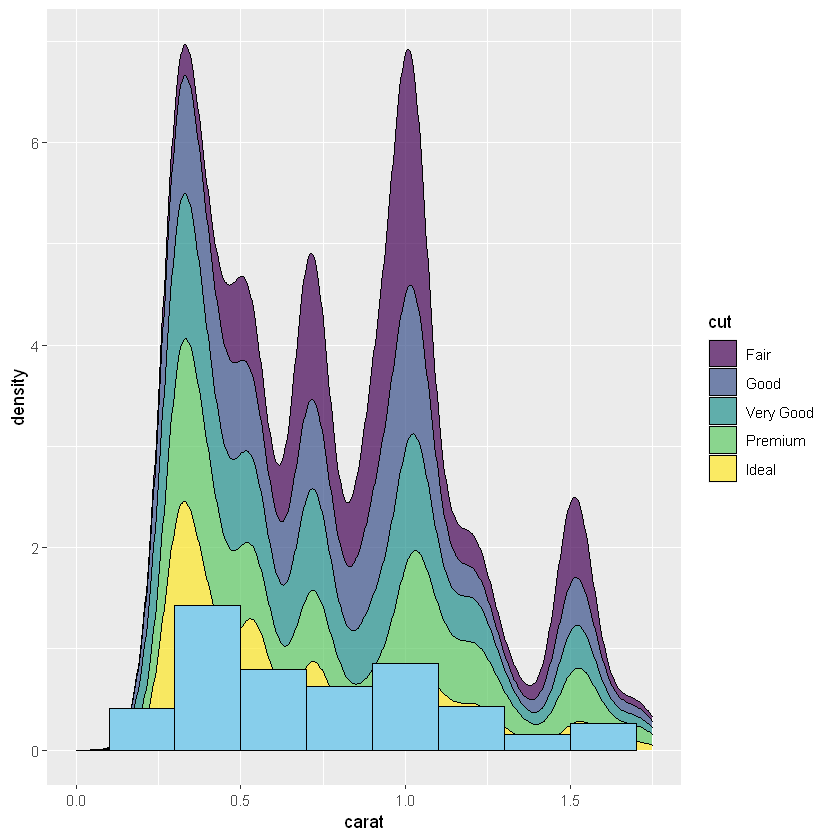

In [6]:
# Initialize plot
ggplot(data=diamonds, aes(x=carat)) +
        # Limit the x-axis*
        xlim(0,1.75) +
        geom_density(position="stack", aes(fill=cut), alpha = 0.7) + 
        # without aes(y = ..density..) the scale of KDE will make it invisible  
        geom_histogram(fill="skyblue", col="black", binwidth = 0.2, aes(y = ..density..))

### Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.
  
ggplot2 do not provide an easy way to do this, but let's try another library, GGally.
We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:


Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



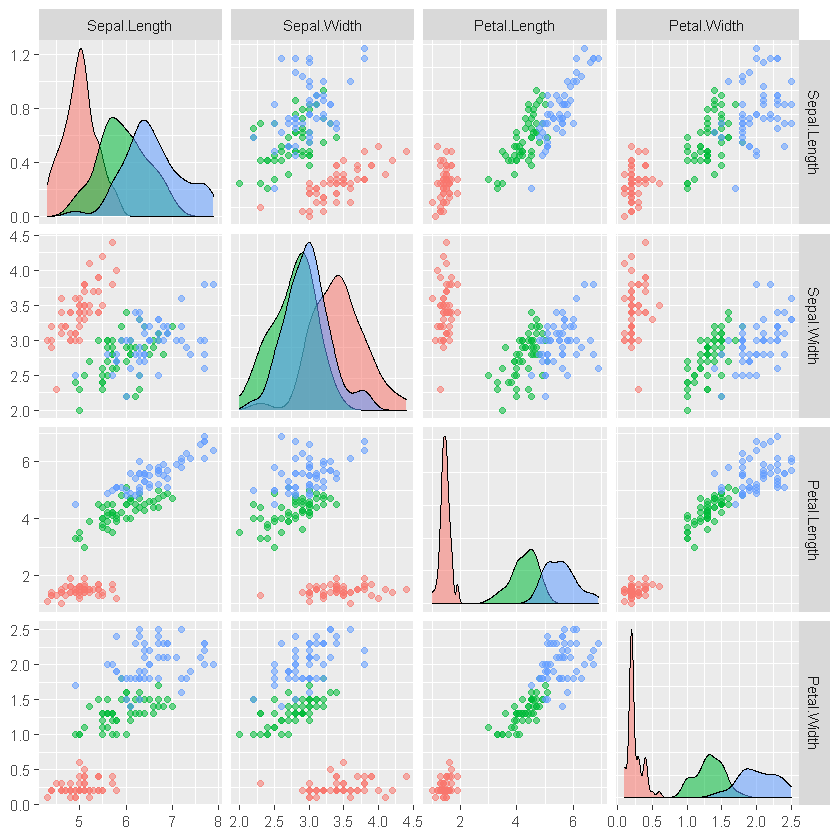

In [7]:
if (!require("GGally")) {
    install.packages("GGally")
    library(GGally)
}

ggpairs(iris, columns = 1:4, aes(color = Species, alpha = 0.5),
        upper = list(continuous = "points"))

<a id='plotly'></a>

## Plotly
Plotly is an R library/package for creating interactive, publication-quality graphs. Some of the charts you can do are Basic charts, Statistical charts, Scientific charts, Financial charts, Maps, 3D charts, Subplots, Transforms, Animations, etc.
### Interactive
And all of them, all Plotly plots are interactive. This means that after the image is shown you can:
- download the plot as image;
- zoom in/out;
- select a section to zoom in.

In [4]:
if (!require("plotly")) {
    install.packages("plotly")
    library(plotly)
}
head(iris, 3)
fig <- plot_ly(data = iris, x = ~Petal.Length, y = ~Sepal.Width, 
            color = ~Species, size=8,
            marker = list(line = list(color = 'gray', width = 1)))
fig <- fig %>% layout(title = 'Customized Scatter Plot',
            yaxis = list(zeroline = FALSE),
            xaxis = list(zeroline = FALSE), 
            margin = list(l = 50, r = 50, b = 70, t = 100, pad = 10))
# this line is required when running in jupyter notebook
embed_notebook(fig)
# this line when used in RStudio or from console
# fig

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa

No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode



<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+DQo8dGl0bGU+cGxvdGx5PC90aXRsZT4NCjxzY3JpcHQgc3JjPSJkYXRhOmFwcGxpY2F0aW9uL2phdmFzY3JpcHQ7YmFzZTY0LEtHWjFibU4wYVc5dUtDa2dld29nSUM4dklFbG1JSGRwYm1SdmR5NUlWRTFNVjJsa1oyVjBjeUJwY3lCaGJISmxZV1I1SUdSbFptbHVaV1FzSUhSb1pXNGdkWE5sSUdsME95QnZkR2hsY25kcGMyVWdZM0psWVhSbElHRUtJQ0F2THlCdVpYY2diMkpxWldOMExpQlVhR2x6SUdGc2JHOTNjeUJ3Y21WalpXUnBibWNnWTI5a1pTQjBieUJ6WlhRZ2IzQjBhVzl1Y3lCMGFHRjBJR0ZtWm1WamRDQjBhR1VLSUNBdkx5QnBibWwwYVdGc2FYcGhkR2x2YmlCd2NtOWpaWE56SUNoMGFHOTFaMmdnYm05dVpTQmpkWEp5Wlc1MGJIa2daWGhwYzNRcExnb2dJSGRwYm1SdmR5NUlWRTFNVjJsa1oyVjBjeUE5SUhkcGJtUnZkeTVJVkUxTVYybGtaMlYwY3lCOGZDQjdmVHNLQ2lBZ0x5OGdVMlZsSUdsbUlIZGxKM0psSUhKMWJtNXBibWNnYVc0Z1lTQjJhV1YzWlhJZ2NHRnVaUzRnU1dZZ2JtOTBMQ0IzWlNkeVpTQnBiaUJoSUhkbFlpQmljbTkzYzJWeUxnb2dJSFpoY2lCMmFXVjNaWEpOYjJSbElEMGdkMmx1Wkc5M0xraFVUVXhYYVdSblpYUnpMblpwWlhkbGNrMXZaR1VnUFFvZ0lDQWdJQ0F2WEdKMmFXVjNaWEpmY0dGdVpUMHhYR0l2TG5SbGMzUW9kMmx1Wkc5M0xteHZZMkYwYVc5dUtUc0tDaUFnTHk4Z1UyVmxJR2xtSUhkbEozSmxJSEoxYm01cGJtY2dhVzRnVTJocGJua2diVzlrWlM0Z1NXWWdibTkwTENCcGRDZHpJR0VnYzNSaGRHbGpJR1J2WTNWdFpXNTBMZ29nSUM4dklFNXZkR1VnZEdoaGRDQnpkR0YwYVdNZ2QybGtaMlYwY3lCallXNGdZWEJ3WldGeUlHbHVJR0p2ZEdnZ1UyaHBibmtnWVc1a0lITjBZWFJwWXlCdGIyUmxjeXdnWW5WMENpQWdMeThnYjJKMmFXOTFjMng1TENCVGFHbHVlU0IzYVdSblpYUnpJR05oYmlCdmJteDVJR0Z3Y0dWaGNpQnBiaUJUYUdsdWVTQmhjSEJ6TDJSdlkzVnRaVzUwY3k0S0lDQjJZWElnYzJocGJubE5iMlJsSUQwZ2QybHVaRzkzTGtoVVRVeFhhV1JuWlhSekxuTm9hVzU1VFc5a1pTQTlDaUFnSUNBZ0lIUjVjR1Z2WmloM2FXNWtiM2N1VTJocGJua3BJQ0U5UFNBaWRXNWtaV1pwYm1Wa0lpQW1KaUFoSVhkcGJtUnZkeTVUYUdsdWVTNXZkWFJ3ZFhSQ2FXNWthVzVuY3pzS0NpQWdMeThnVjJVZ1kyRnVKM1FnWTI5MWJuUWdiMjRnYWxGMVpYSjVJR0psYVc1bklHRjJZV2xzWVdKc1pTd2djMjhnZDJVZ2FXMXdiR1Z0Wlc1MElHOTFjaUJ2ZDI0S0lDQXZMeUIyWlhKemFXOXVJR2xtSUc1bFkyVnpjMkZ5ZVM0S0lDQm1kVzVqZEdsdmJpQnhkV1Z5ZVZObGJHVmpkRzl5UVd4c0tITmpiM0JsTENCelpXeGxZM1J2Y2lrZ2V3b2dJQ0FnYVdZZ0tIUjVjR1Z2WmlocVVYVmxjbmtwSUNFOVBTQWlkVzVrWldacGJtVmtJaUFtSmlCelkyOXdaU0JwYm5OMFlXNWpaVzltSUdwUmRXVnllU2tnZXdvZ0lDQWdJQ0J5WlhSMWNtNGdjMk52Y0dVdVptbHVaQ2h6Wld4bFkzUnZjaWs3Q2lBZ0lDQjlDaUFnSUNCcFppQW9jMk52Y0dVdWNYVmxjbmxUWld4bFkzUnZja0ZzYkNrZ2V3b2dJQ0FnSUNCeVpYUjFjbTRnYzJOdmNHVXVjWFZsY25sVFpXeGxZM1J2Y2tGc2JDaHpaV3hsWTNSdmNpazdDaUFnSUNCOUNpQWdmUW9LSUNCbWRXNWpkR2x2YmlCaGMwRnljbUY1S0haaGJIVmxLU0I3Q2lBZ0lDQnBaaUFvZG1Gc2RXVWdQVDA5SUc1MWJHd3BDaUFnSUNBZ0lISmxkSFZ5YmlCYlhUc0tJQ0FnSUdsbUlDZ2tMbWx6UVhKeVlYa29kbUZzZFdVcEtRb2dJQ0FnSUNCeVpYUjFjbTRnZG1Gc2RXVTdDaUFnSUNCeVpYUjFjbTRnVzNaaGJIVmxYVHNLSUNCOUNnb2dJQzh2SUVsdGNHeGxiV1Z1ZENCcVVYVmxjbmtuY3lCbGVIUmxibVFLSUNCbWRXNWpkR2x2YmlCbGVIUmxibVFvZEdGeVoyVjBJQzhxTENBdUxpNGdLaThwSUhzS0lDQWdJR2xtSUNoaGNtZDFiV1Z1ZEhNdWJHVnVaM1JvSUQwOUlERXBJSHNLSUNBZ0lDQWdjbVYwZFhKdUlIUmhjbWRsZERzS0lDQWdJSDBLSUNBZ0lHWnZjaUFvZG1GeUlHa2dQU0F4T3lCcElEd2dZWEpuZFcxbGJuUnpMbXhsYm1kMGFEc2dhU3NyS1NCN0NpQWdJQ0FnSUhaaGNpQnpiM1Z5WTJVZ1BTQmhjbWQxYldWdWRITmJhVjA3Q2lBZ0lDQWdJR1p2Y2lBb2RtRnlJSEJ5YjNBZ2FXNGdjMjkxY21ObEtTQjdDaUFnSUNBZ0lDQWdhV1lnS0hOdmRYSmpaUzVvWVhOUGQyNVFjbTl3WlhKMGVTaHdjbTl3S1NrZ2V3b2dJQ0FnSUNBZ0lDQWdkR0Z5WjJWMFczQnliM0JkSUQwZ2MyOTFjbU5sVzNCeWIzQmRPd29nSUNBZ0lDQWdJSDBLSUNBZ0lDQWdmUW9nSUNBZ2ZRb2dJQ0FnY21WMGRYSnVJSFJoY21kbGREc0tJQ0I5Q2dvZ0lDOHZJRWxGT0NCa2IyVnpiaWQwSUhOMWNIQnZjblFnUVhKeVlYa3VabTl5UldGamFDNEtJQ0JtZFc1amRHbHZiaUJtYjNKRllXTm9LSFpoYkhWbGN5d2dZMkZzYkdKaFkyc3NJSFJvYVhOQmNtY3BJSHNLSUNBZ0lHbG1JQ2gyWVd4MVpYTXVabTl5UldGamFDa2dld29nSUNBZ0lDQjJZV3gxWlhNdVptOXlSV0ZqYUNoallXeHNZbUZqYXl3Z2RHaHBjMEZ5WnlrN0NpQWdJQ0I5SUdWc2MyVWdld29nSUNBZ0lDQm1iM0lnS0haaGNpQnBJRDBnTURzZ2FTQThJSFpoYkhWbGN5NXNaVzVuZEdnN0lHa3JLeWtnZXdvZ0lDQWdJQ0FnSUdOaGJHeGlZV05yTG1OaGJHd29kR2hwYzBGeVp5d2dkbUZzZFdWelcybGRMQ0JwTENCMllXeDFaWE1wT3dvZ0lDQWdJQ0I5Q2lBZ0lDQjlDaUFnZlFvS0lDQXZMeUJTWlhCc1lXTmxjeUIwYUdVZ2MzQmxZMmxtYVdWa0lHMWxkR2h2WkNCM2FYUm9JSFJvWlNCeVpYUjFjbTRnZG1Gc2RXVWdiMllnWm5WdVkxTnZkWEpqWlM0S0lDQXZMd29nSUM4dklFNXZkR1VnZEdoaGRDQm1kVzVqVTI5MWNtTmxJSE5vYjNWc1pDQnViM1FnUWtVZ2RHaGxJRzVsZHlCdFpYUm9iMlFzSUdsMElITm9iM1ZzWkNCaVpTQmhJR1oxYm1OMGFXOXVDaUFnTHk4Z2RHaGhkQ0JTUlZSVlV

<a id='shiny'></a>

## Shiny
The package is used to create web-applications, but uses the R language rather than javascript or HTML5, which are traditionally used for web applications. By using R, Shiny provides an efficient method of creating web applications designed around data presentation and analysis.

<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Basic Plotting](05.01-Basic-Plotting.ipynb) | [Contents](00.00-Index.ipynb) | [Quiz](05.03-Quiz.ipynb) > [Top](#top) ^ </span>

<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>This is the Jupyter notebook version of the __Python for Official Statistics__ produced by Eurostat; the content is available [on GitHub](https://github.com/eurostat/e-learning/tree/main/python-official-statistics).
<br>The text and code are released under the [EUPL-1.2 license](https://github.com/eurostat/e-learning/blob/main/LICENSE).</span>